In [1]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
df=pd.read_csv('german.csv')
data=df.copy()

In [3]:
data

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,2,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,3,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,4,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,5,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,bad,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,A14,12,A32,A42,1736,A61,A74,3,A92,...,A121,31,A143,A152,1,A172,good,A191,A201,1
996,997,A11,30,A32,A41,3857,A61,A73,4,A91,...,A122,40,A143,A152,1,A174,good,A192,A201,1
997,998,A14,12,A32,A43,804,A61,A75,4,A93,...,A123,38,A143,A152,1,A173,good,A191,A201,1
998,999,A11,45,A32,A43,1845,A61,A73,4,A93,...,A124,23,A143,A153,1,A173,good,A192,A201,2


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
#data.rename(columns={'pop':'population',
#                          'lifeExp':'life_exp',
#                          'gdpPercap':'gdp_per_cap'}, 
#                 inplace=True)

In [6]:
column_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
new_names = ['chk_acct','duration','credit_hist','purpose','amount','saving_acct', 'present-emp','installment_rate','sex', 'other_debtor','present_resid','property','age','other_install','housing','n_credits','job', 'n_people', 'telephone','foreign','response']
old_names = data.columns[column_indices]
data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [7]:
data

,chk_acct,duration,credit_hist,purpose,amount,saving_acct,present-emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,good,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,good,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,good,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,good,A192,A201,2


In [8]:
data.head()

,chk_acct,duration,credit_hist,purpose,amount,saving_acct,present-emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,2


In [9]:
data.tail()

,chk_acct,duration,credit_hist,purpose,amount,saving_acct,present-emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,good,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,good,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,good,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,good,A192,A201,2
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,...,A123,27,A143,A152,1,A173,good,A191,A201,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   chk_acct          1000 non-null   object
 1   duration          1000 non-null   int64 
 2   credit_hist       1000 non-null   object
 3   purpose           1000 non-null   object
 4   amount            1000 non-null   int64 
 5   saving_acct       1000 non-null   object
 6   present-emp       1000 non-null   object
 7   installment_rate  1000 non-null   int64 
 8   sex               1000 non-null   object
 9   other_debtor      1000 non-null   object
 10  present_resid     1000 non-null   int64 
 11  property          1000 non-null   object
 12  age               1000 non-null   int64 
 13  other_install     1000 non-null   object
 14  housing           1000 non-null   object
 15  n_credits         1000 non-null   int64 
 16  job               1000 non-null   object
 17  n_people       

In [11]:
data.describe(include='all')

,chk_acct,duration,credit_hist,purpose,amount,saving_acct,present-emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000,1000,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,2,2,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,...,A123,NaN,A143,A152,NaN,A173,good,A191,A201,NaN
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,845,596,963,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,NaN,NaN,NaN,1.300000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,NaN,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,2.000000


In [12]:
data.isnull().sum()

chk_acct            0
duration            0
credit_hist         0
purpose             0
amount              0
saving_acct         0
present-emp         0
installment_rate    0
sex                 0
other_debtor        0
present_resid       0
property            0
age                 0
other_install       0
housing             0
n_credits           0
job                 0
n_people            0
telephone           0
foreign             0
response            0
dtype: int64

In [13]:
data['response']-=1

In [14]:
Title_Dictionary= {

                    "good":       1,

                    "bad":        2}
data['n_people']=data['n_people'].map(Title_Dictionary) 

In [15]:
data

,chk_acct,duration,credit_hist,purpose,amount,saving_acct,present-emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,0
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,0
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,0
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,1


In [16]:
#Mapping Categorical variables into numerical ones 
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [17]:
data['chk_acct']=le.fit_transform(data['chk_acct'])
data['credit_hist']=le.fit_transform(data['credit_hist'])
data['purpose']=le.fit_transform(data['purpose'])
data['saving_acct']=le.fit_transform(data['saving_acct'])
data['present-emp']=le.fit_transform(data['present-emp'])
data['sex']=le.fit_transform(data['sex'])
data['other_debtor']=le.fit_transform(data['other_debtor'])
data['property']=le.fit_transform(data['property'])
data['other_install']=le.fit_transform(data['other_install'])
data['housing']=le.fit_transform(data['housing'])
data['job']=le.fit_transform(data['job'])
data['telephone']=le.fit_transform(data['telephone'])
data['foreign']=le.fit_transform(data['foreign'])
data['response']=le.fit_transform(data['response'])

In [18]:
data

,chk_acct,duration,credit_hist,purpose,amount,saving_acct,present-emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,0
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,1
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,0
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,3,1736,0,3,3,1,0,...,0,31,2,1,1,1,1,0,0,0
996,0,30,2,1,3857,0,2,4,0,0,...,1,40,2,1,1,3,1,1,0,0
997,3,12,2,4,804,0,4,4,2,0,...,2,38,2,1,1,2,1,0,0,0
998,0,45,2,4,1845,0,2,4,2,0,...,3,23,2,2,1,2,1,1,0,1


In [19]:
data.columns

Index(['chk_acct', 'duration', 'credit_hist', 'purpose', 'amount',
       'saving_acct', 'present-emp', 'installment_rate', 'sex', 'other_debtor',
       'present_resid', 'property', 'age', 'other_install', 'housing',
       'n_credits', 'job', 'n_people', 'telephone', 'foreign', 'response'],
      dtype='object')

In [20]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 15 , 16 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )


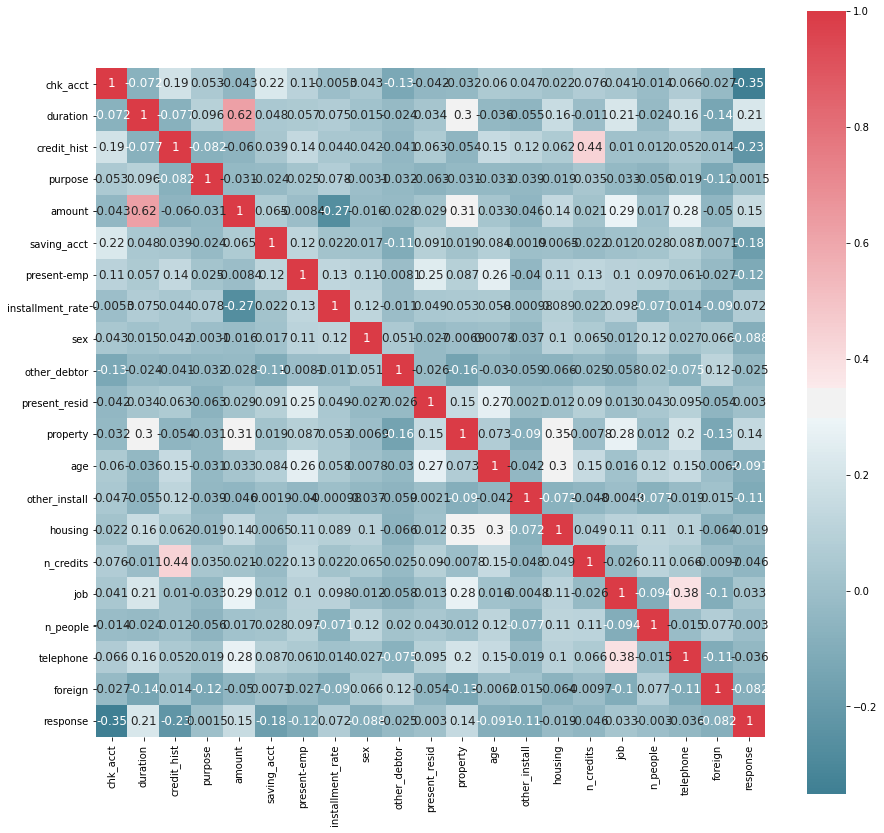

In [21]:
plot_correlation_map(data)

In [22]:
data1=data[['n_people', 'duration','amount','installment_rate','age','n_credits','present_resid']]
data1

,n_people,duration,amount,installment_rate,age,n_credits,present_resid
0,1,6,1169,4,67,2,4
1,1,48,5951,2,22,1,2
2,2,12,2096,2,49,1,3
3,2,42,7882,2,45,1,4
4,2,24,4870,3,53,2,4
...,...,...,...,...,...,...,...
995,1,12,1736,3,31,1,4
996,1,30,3857,4,40,1,4
997,1,12,804,4,38,1,4
998,1,45,1845,4,23,1,4


In [23]:
#fig1, ax1 = plt.subplots(1, 4,figsize=(5, 5))
#fig2, ax2 = plt.subplots(1, 3,figsize=(5, 5))
#m=0
#for i in range(2):
    #for j in range(4):
#for j in range(7):
#        data1.hist(column = data1.columns[m], bins = 12)
#        m+=1

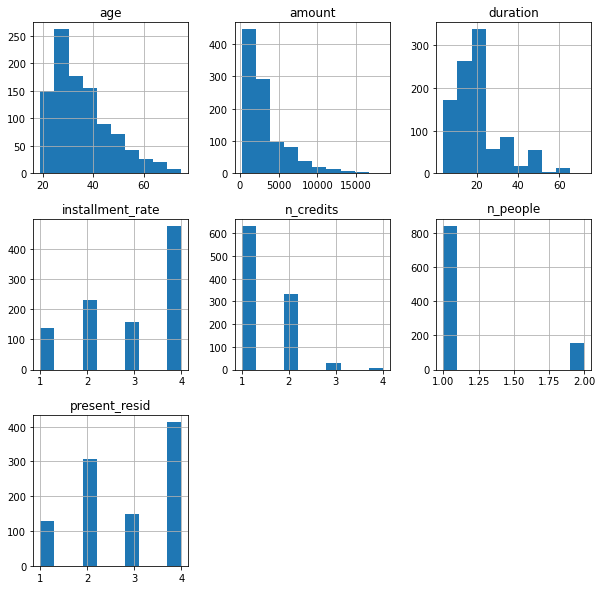

In [24]:
df = pd.DataFrame(data1)
df.hist(figsize=(10,10))
plt.show()

In [25]:
data2=data.drop(['n_people', 'duration','amount','installment_rate','age','n_credits','present_resid'], axis=1)

In [26]:
data2

,chk_acct,credit_hist,purpose,saving_acct,present-emp,sex,other_debtor,property,other_install,housing,job,telephone,foreign,response
0,0,4,4,4,4,2,0,0,2,1,2,1,0,0
1,1,2,4,0,2,1,0,0,2,1,2,0,0,1
2,3,4,7,0,3,2,0,0,2,1,1,0,0,0
3,0,2,3,0,3,2,2,1,2,2,2,0,0,0
4,0,3,0,0,2,2,0,3,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,3,0,3,1,0,0,2,1,1,0,0,0
996,0,2,1,0,2,0,0,1,2,1,3,1,0,0
997,3,2,4,0,4,2,0,2,2,1,2,0,0,0
998,0,2,4,0,2,2,0,3,2,2,2,1,0,1


In [27]:
#df = pd.DataFrame(data2)
#df.plot(kind='bar', figsize=(10,20))

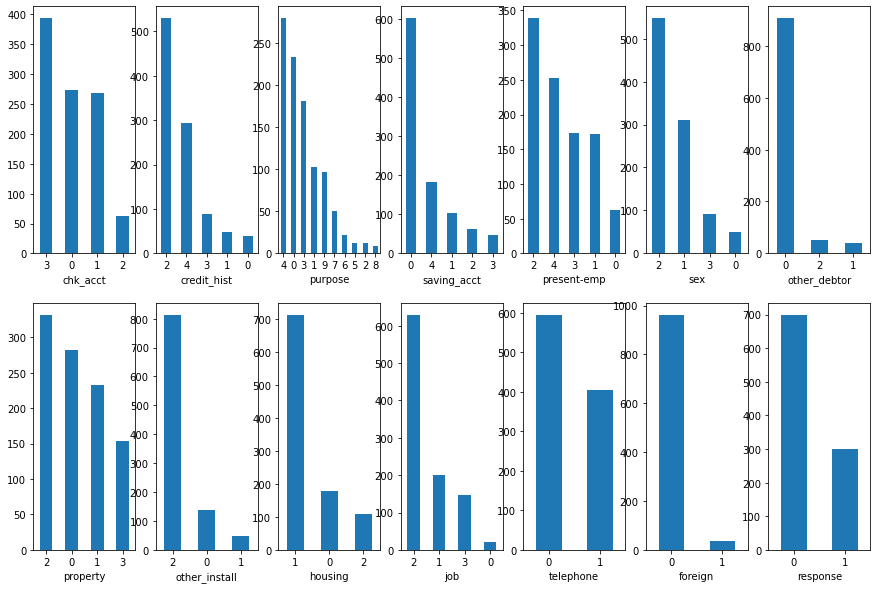

In [28]:
fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=7)
m=0
for i in range(2):
    for j in range(7):
        data2[data2.columns[m]].value_counts().plot.bar(ax=axes[i,j],rot=0)
        axes[i,j].set(xlabel=data2.columns[m])
        m+=1
        
#data2['chk_acct'].plot(ax=axes[i,j], kind='bar')


In [29]:
def visualize_distribution(df,attr):
    good_risk_df = df[df["response"]==1]
    bad_risk_df = df[df["response"]==0]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'response']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'response']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['response'].index.tolist(), attr_good_risk_df['response'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['response'].index.tolist(), attr_bad_risk_df['response'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=['n_people', 'duration','amount','installment_rate','age','n_credits','present_resid']
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['response'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['response'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['response'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['response'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

Installment rate VS Response 


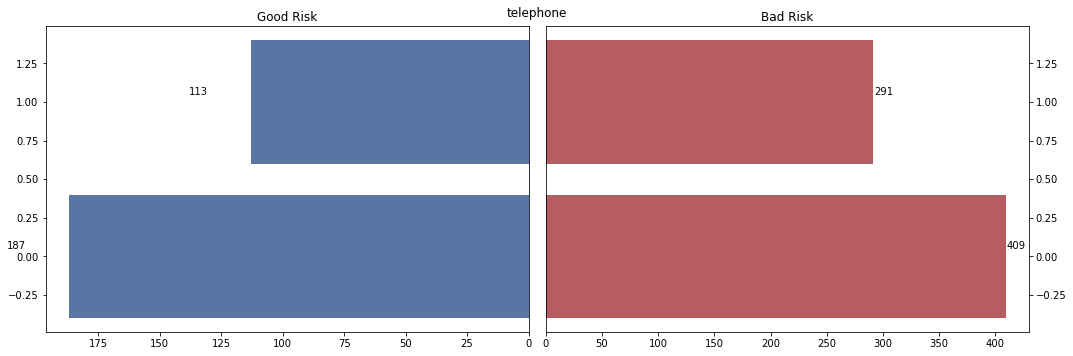

In [30]:
import seaborn as sns
visualize_distribution(data,"telephone")

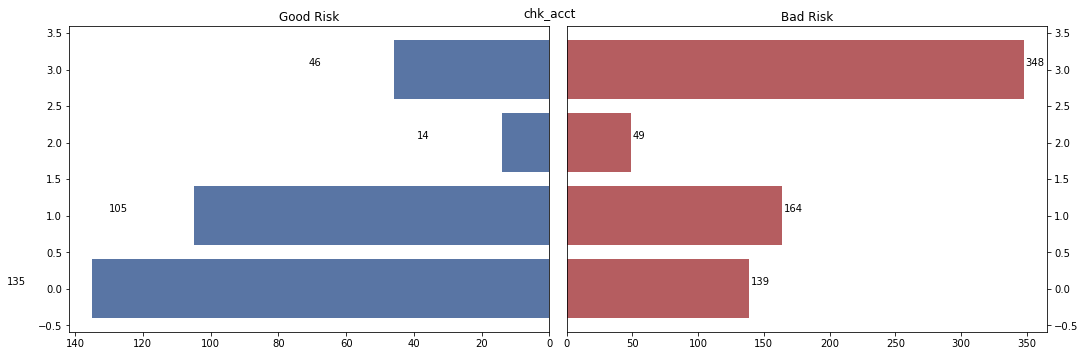

In [31]:
visualize_distribution(data,"chk_acct")

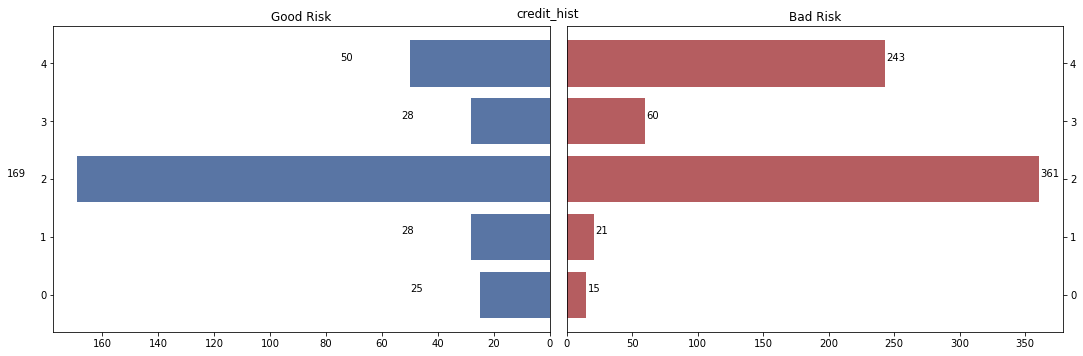

In [32]:
visualize_distribution(data,"credit_hist")

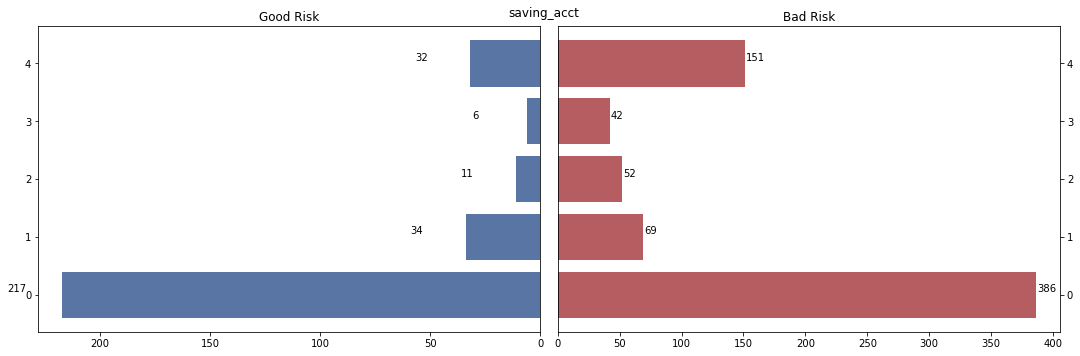

In [33]:
visualize_distribution(data,"saving_acct")

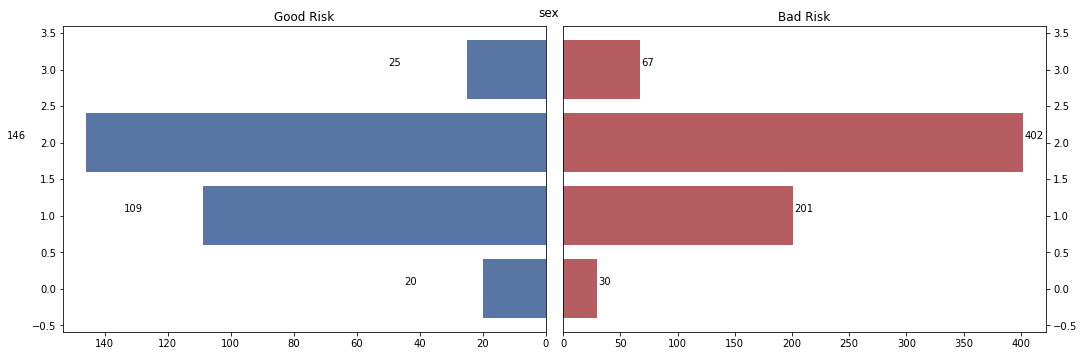

In [34]:
visualize_distribution(data,"sex")

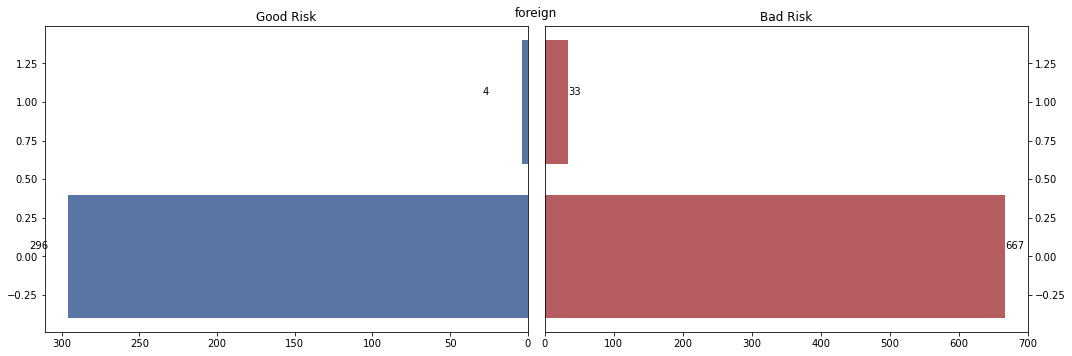

In [35]:
visualize_distribution(data,"foreign")

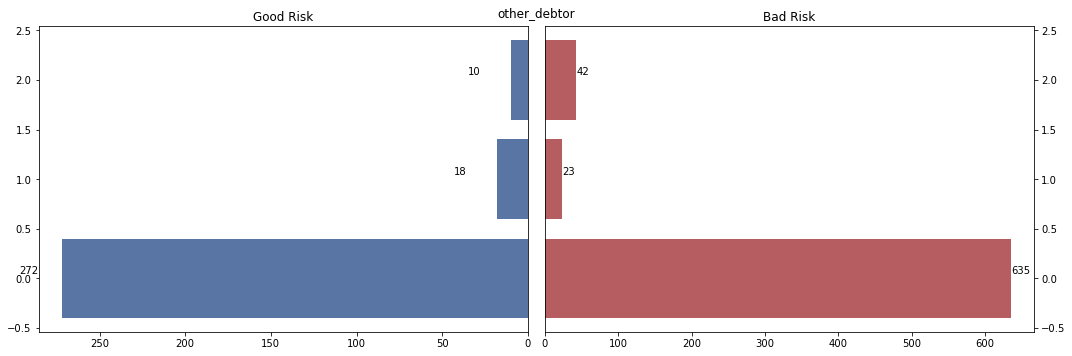

In [36]:
visualize_distribution(data,"other_debtor")

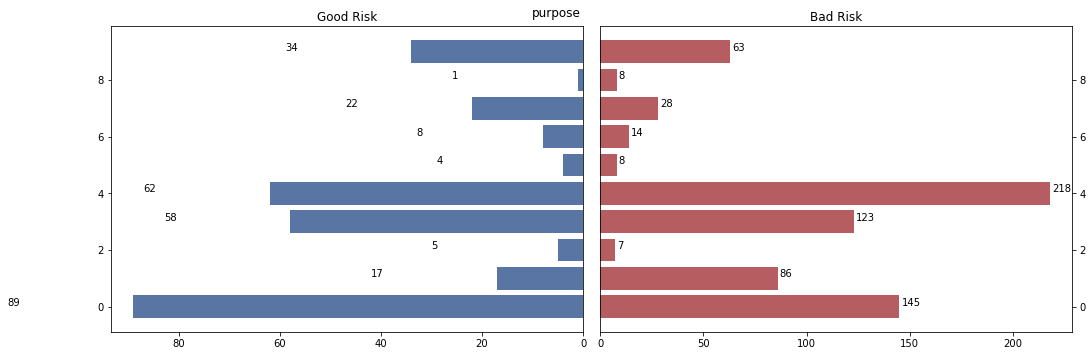

In [37]:
visualize_distribution(data,"purpose")

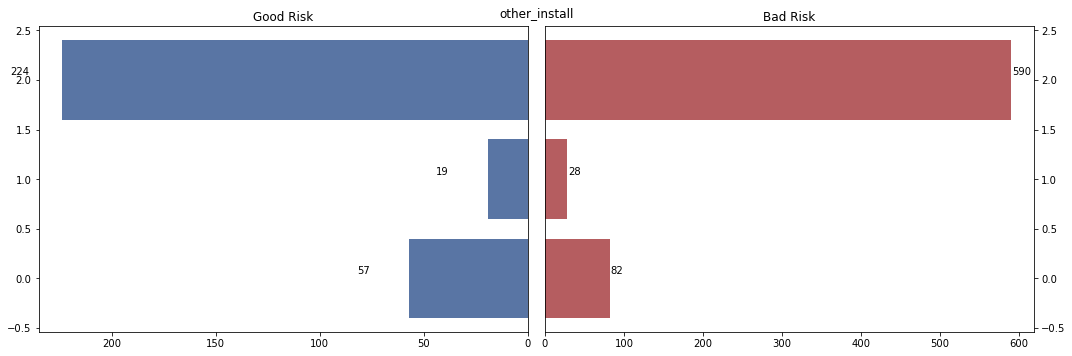

In [38]:
visualize_distribution(data,"other_install")

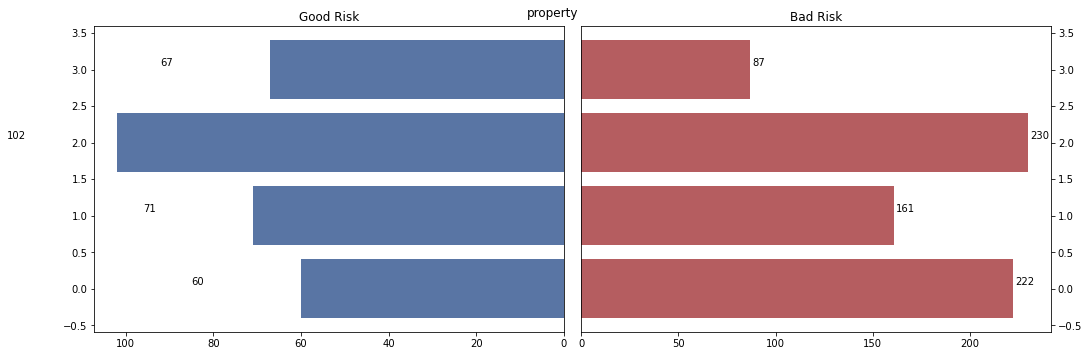

In [39]:
visualize_distribution(data,"property")

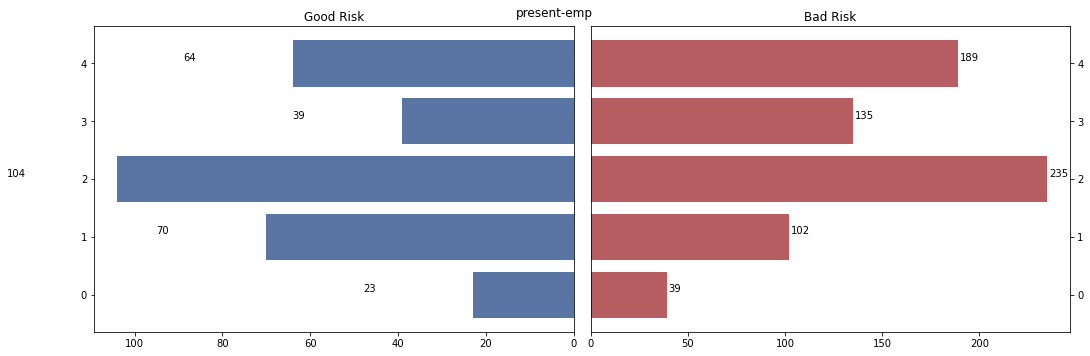

In [40]:
visualize_distribution(data,"present-emp")

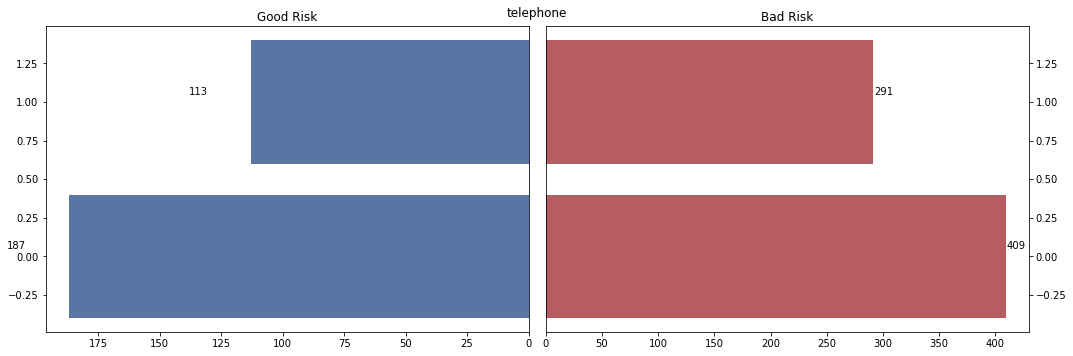

In [41]:
visualize_distribution(data,"telephone")

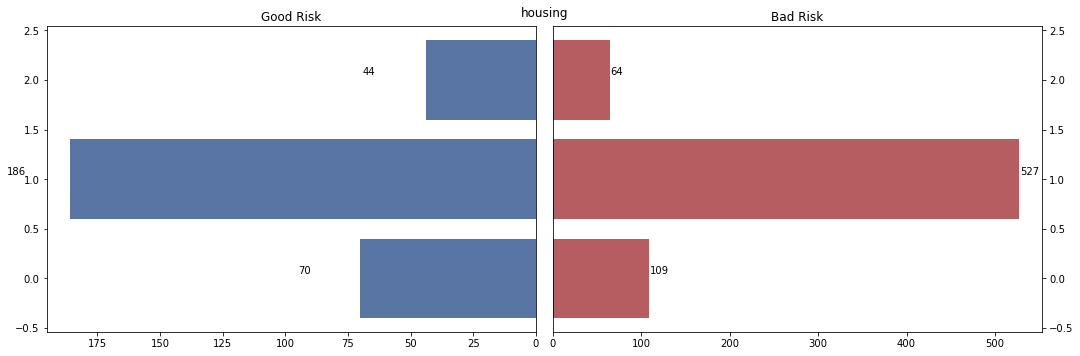

In [42]:
visualize_distribution(data,"housing")

In [43]:
#visualize_distribution(data,"duration")

In [44]:
#visualize_distribution(data,"amount")

In [45]:
#visualize_distribution(data,"age")

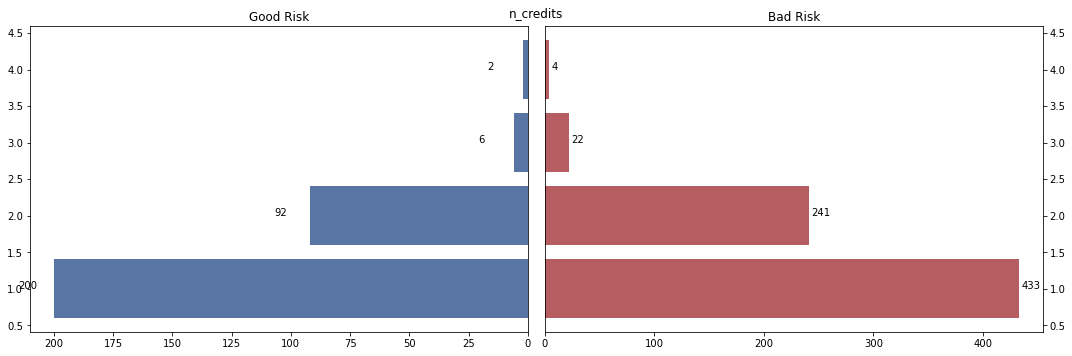

In [46]:
visualize_distribution(data,"n_credits")

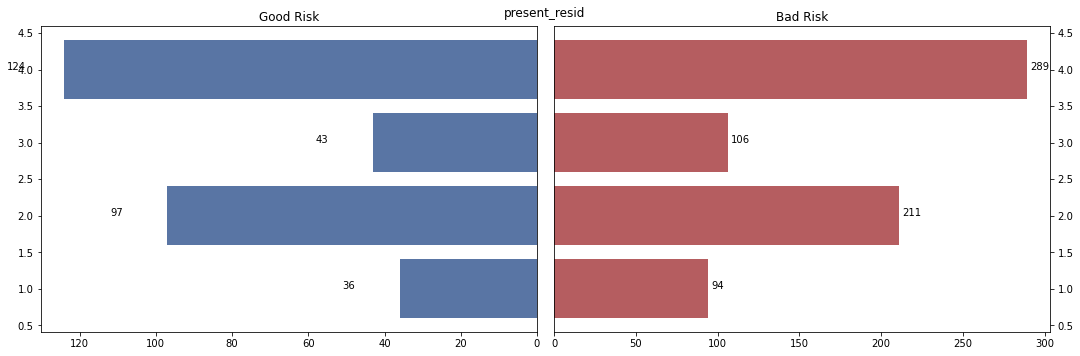

In [47]:
visualize_distribution(data,"present_resid")

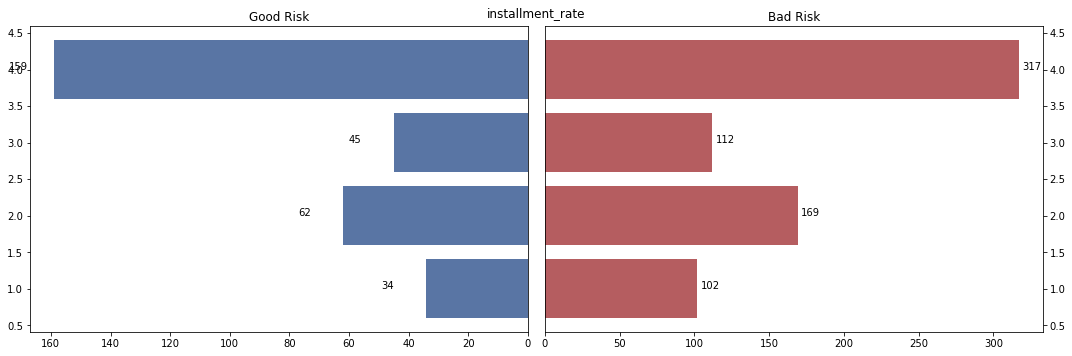

In [48]:
visualize_distribution(data,"installment_rate")

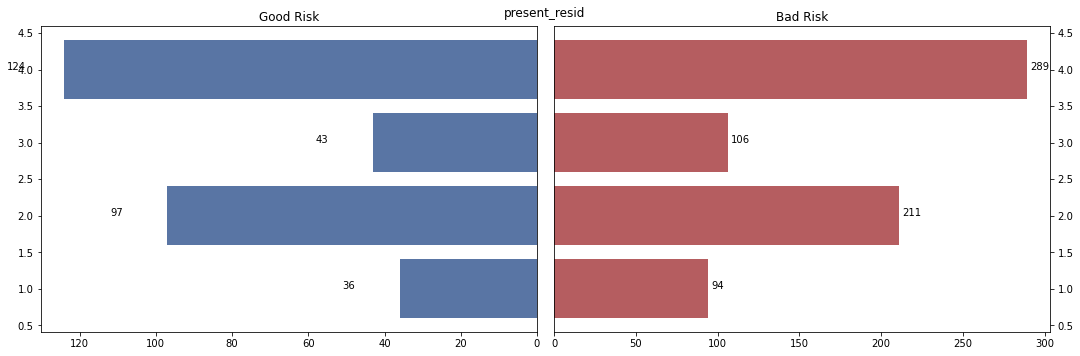

In [49]:
visualize_distribution(data,"present_resid")


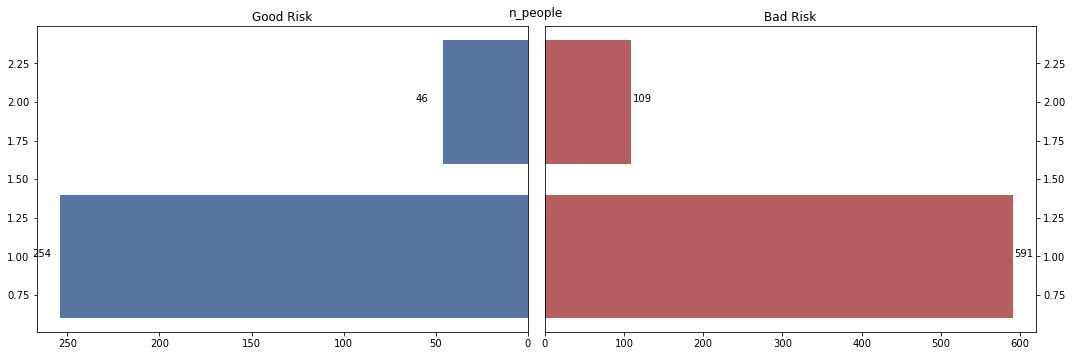

In [50]:
visualize_distribution(data,"n_people")

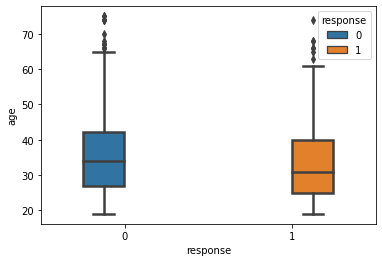

In [51]:
sns.boxplot(x="response",
                y="age",data=data,hue ="response",linewidth=2.5,width=0.5) 

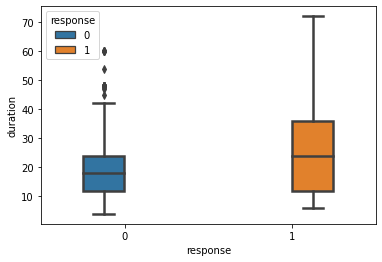

In [52]:
sns.boxplot(x="response",
                y="duration",data=data,hue ="response",linewidth=2.5,width=0.5) 

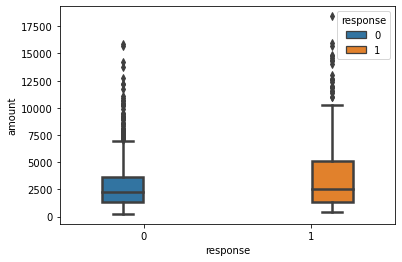

In [56]:
sns.boxplot(x="response",
                y="amount",data=data,hue ="response",linewidth=2.5,width=0.5) 

In [67]:
from scipy import stats
from scipy import stats
#import scikitplot as skplt
from math import floor,ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt
#from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score


import warnings
warnings.simplefilter('ignore', DeprecationWarning)

Feature Selection 

In [77]:
column_names_cat_stats=['chk_acct','credit_hist','purpose',\
                        'saving_acct', 'present-emp','installment_rate','sex', \
                        'other_debtor','present_resid','property','other_install',\
                        'housing','n_credits','job', 'n_people', 'telephone','foreign']
df=data
statistical_significance=[]
for attr in column_names_cat_stats:
    data_count=pd.crosstab(df[attr],df["response"]).reset_index()
    obs=np.asarray(data_count[[1,0]])
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]





,Attribute,P-value
0,chk_acct,0.000000
1,credit_hist,0.000000
2,purpose,0.000116
3,saving_acct,0.000000
4,present-emp,0.001045
5,installment_rate,0.140033
6,sex,0.022238
7,other_debtor,0.036056
8,present_resid,0.861552
9,property,0.000029


In [ ]:
statistical_significance

In [79]:
statistical_significance=[]
column_names_cont_stats=["amount","age","duration"]
good_risk_df = df[df["response"]==1]
bad_risk_df = df[df["response"]==0]
for attr in column_names_cont_stats:
    statistic, p=stats.f_oneway(good_risk_df[attr].values,bad_risk_df[attr].values)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]


In [80]:
statistical_significance

,Attribute,P-value
0,amount,0.000001
1,age,0.003925
2,duration,0.000000


In [87]:
New_data=data[['chk_acct','credit_hist','purpose','saving_acct', 'present-emp','sex','amount','age' ,'duration',\
               'foreign','housing','other_install','property','other_debtor','response']]
                       

Feature Engineering Grouping age per category + conversion of months to years 

Train & Split 

In [94]:
y = New_data["response"].values
X = New_data.drop('response',1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)


KNN 

In [96]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [98]:
knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(X_train,y_train) #Training KNN classifier
y_pred=knn.predict(X_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.7133333333333334


In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7633333333333333


In [102]:
#Import svm model
from sklearn import svm

In [107]:
#Create a svm Classifier
#clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
#clf.fit(X_train, y_train)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [91]:
y.shape

(1000,)

In [92]:
X.shape

(1000, 14)

(array([180., 406.,   0., 244.,   0., 106.,  50.,   0.,  13.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

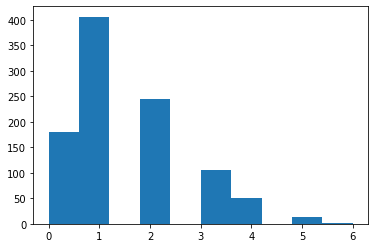